### **Importing Required Libraries**

In [193]:
from matplotlib import pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG19
import os
import itertools
from PIL import Image
import numpy as np
import pickle
from keras.regularizers import l2
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix

### **Loading Train Image and Test Image Data**

In [194]:
# Specifying the train directory and test directory inside a variable to use in different functions
train_directory = r'C:\Users\njain\OneDrive - Cal State Fullerton\SPRING 2024\CPSC 597 Project\Project\APMBSS\data\raw\face_detection\train'
test_directory = r'C:\Users\njain\OneDrive - Cal State Fullerton\SPRING 2024\CPSC 597 Project\Project\APMBSS\data\raw\face_detection\test'

# Creating the train and test ImageDataGenerator instances
train_image_data_generator = ImageDataGenerator(
    rescale = 1./255
)

test_image_data_generator = ImageDataGenerator(
    rescale = 1./255
)

# Loading the train data using flow_from_directory() method using `train_image_data_generator`
training_data = train_image_data_generator.flow_from_directory(
    directory = train_directory,
    target_size = (48, 48),
    batch_size = 32,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

# Loading the test data using flow_from_directory() method using `test_image_data_generator`
testing_data = test_image_data_generator.flow_from_directory(
    directory = test_directory,
    target_size = (48, 48),
    batch_size = 32,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

Found 24176 images belonging to 4 classes.
Found 5241 images belonging to 4 classes.


### **Visualising the Images**

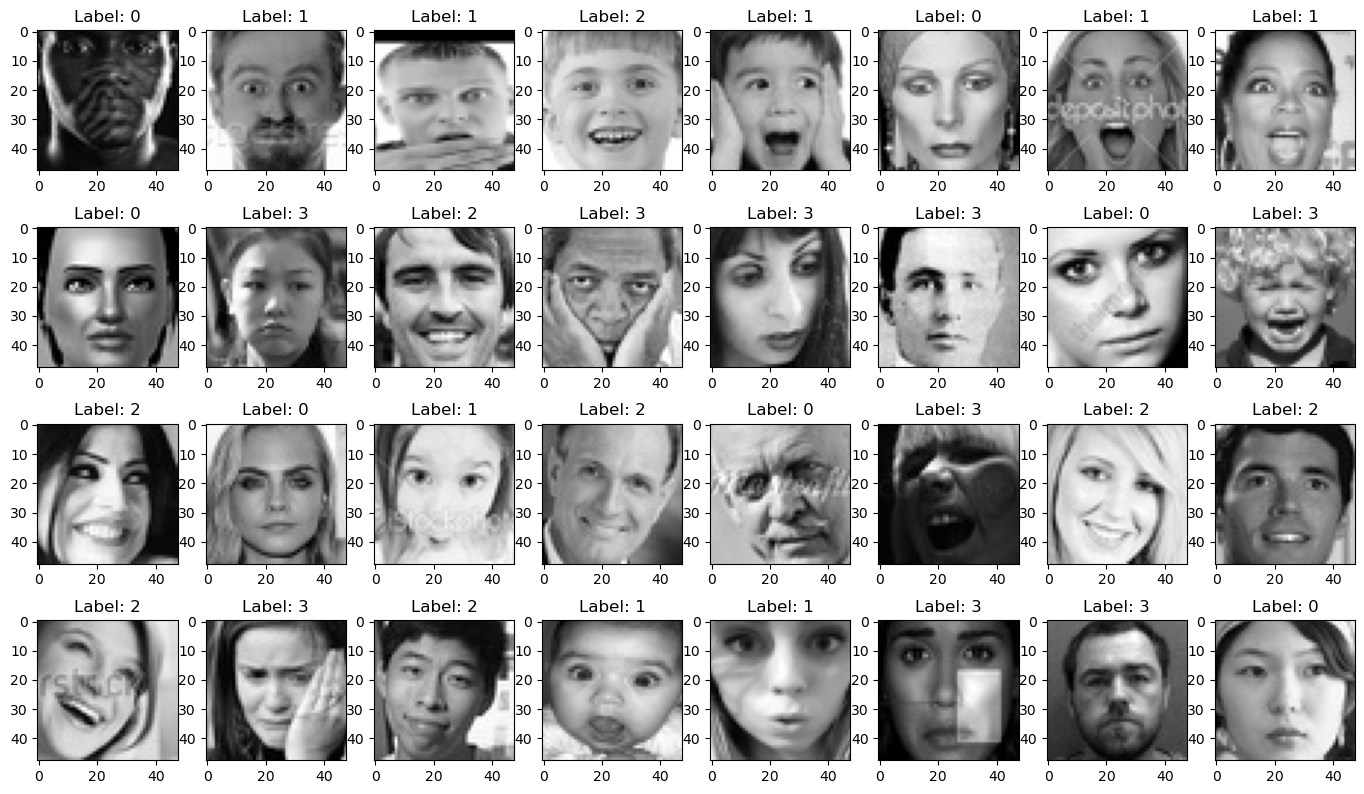

'\nBelow can be concluded from below:\nLabel 0: Calm\nLabel 1: Energetic\nLabel 2: Happy\nLabel 3: Sad\n'

In [195]:
# Getting a batch of images using next() function
sample_images, labels = next(training_data)

# Number of images to display
num_images = len(sample_images)

# Extract folder names from the generator's filenames
folder_names = [os.path.dirname(file) for file in training_data.filenames[:num_images]]

# Plotting the images using matplotlib
plt.figure(figsize =(17, 20))
for i in range(0, num_images):
    plt.subplot(8, 8, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Label: {labels[i].argmax()}")  # Display the one-hot encoded label

plt.show()

'''
Below can be concluded from below:
Label 0: Calm
Label 1: Energetic
Label 2: Happy
Label 3: Sad
'''

### **Plotting the Bar Graph Representing the Number of Items Inside the Categories Using Matplotlib**

#### **Train Data Plotting**

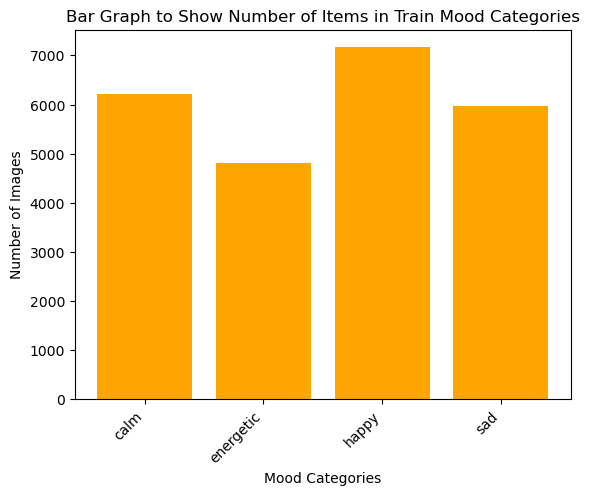

In [196]:
# Already defined the train directory path as train_directory
train_folders = [ folder for folder in os.listdir(train_directory) if os.path.isdir(os.path.join(train_directory, folder))]

folder_names_train = []
item_counts_train = []

for folder in train_folders:
    folder_path = os.path.join(train_directory, folder)
    num_items = len(os.listdir(folder_path))
    folder_names_train.append(folder)
    item_counts_train.append(num_items)

# Create a bar graph
plt.bar(folder_names_train, item_counts_train, color='orange')
plt.xlabel('Mood Categories')
plt.ylabel('Number of Images')
plt.title('Bar Graph to Show Number of Items in Train Mood Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### **Train Data Plotting**

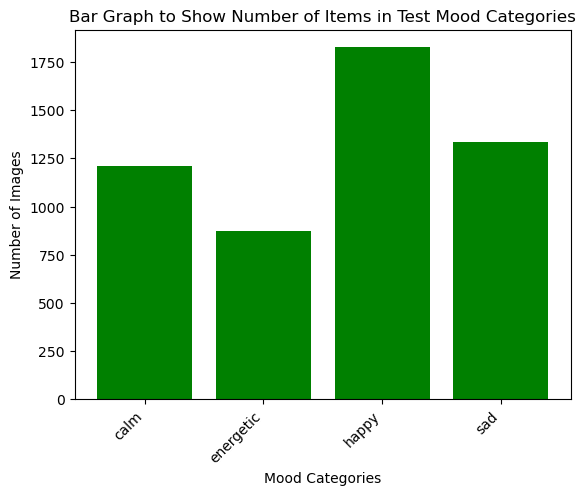

In [197]:
# Already defined the test directory path as test_directory path
test_folders = [ folder for folder in os.listdir(test_directory) if os.path.isdir(os.path.join(test_directory, folder))]

folder_names_test = []
item_counts_test = []

for folder in test_folders:
    folder_path = os.path.join(test_directory, folder)
    num_items = len(os.listdir(folder_path))
    folder_names_test.append(folder)
    item_counts_test.append(num_items)

# Create a bar graph
plt.bar(folder_names_test, item_counts_test, color='green')
plt.xlabel('Mood Categories')
plt.ylabel('Number of Images')
plt.title('Bar Graph to Show Number of Items in Test Mood Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

### **Preprocessing The Data**

### **Create a CNN Model For Image Classification**

In [89]:
# Load VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Create a new model
model = Sequential()
# Add the VGG16 model to the new model
model.add(base_model)
# Add a flatten layer
model.add(Flatten())
# Add a dense layer with 256 neurons
model.add(Dense(256, activation='relu'))
# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))
# Add a final dense layer with 4 neurons (for the 4 categories)
model.add(Dense(4, activation='softmax'))

In [90]:
# Freeze the layers of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Assuming you have your train_generator and validation_generator set up
model.fit(training_data, epochs=20, validation_data=testing_data)

Epoch 1/20
756/756 [==============================] - 405s 529ms/step - loss: 1.2042 - accuracy: 0.4606 - val_loss: 1.1106 - val_accuracy: 0.5157
Epoch 2/20
756/756 [==============================] - 414s 548ms/step - loss: 1.1227 - accuracy: 0.5157 - val_loss: 1.1004 - val_accuracy: 0.5093
Epoch 3/20
756/756 [==============================] - 410s 542ms/step - loss: 1.0945 - accuracy: 0.5261 - val_loss: 1.0745 - val_accuracy: 0.5255
Epoch 4/20
756/756 [==============================] - 457s 605ms/step - loss: 1.0717 - accuracy: 0.5383 - val_loss: 1.0675 - val_accuracy: 0.5361
Epoch 5/20
147/756 [====>.........................] - ETA: 7:40 - loss: 1.0641 - accuracy: 0.5366

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(testing_data)
print(f'Validation Accuracy: {accuracy}')

In [198]:
# mood_detection_model Architecture
mood_detection_model = Sequential()
mood_detection_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
mood_detection_model.add(MaxPooling2D((2, 2)))
mood_detection_model.add(Conv2D(64, (3, 3), activation='relu'))
mood_detection_model.add(MaxPooling2D((2, 2)))
mood_detection_model.add(Conv2D(128, (3, 3), activation='relu'))
mood_detection_model.add(MaxPooling2D((2, 2)))
mood_detection_model.add(Flatten())
mood_detection_model.add(Dense(128, activation='relu'))
mood_detection_model.add(Dropout(0.5))
mood_detection_model.add(Dense(4, activation='softmax'))

In [133]:
# Initializing the Sequential model of tensorflow to create a layered structure of CNN model
mood_detection_model = Sequential()

## Creating CNN layers
# Layer 1 - Input Layer:
mood_detection_model.add(Conv2D(
    32,
    kernel_size = (3, 3),
    activation = 'relu',
    input_shape = (48, 48, 1),
    padding = 'same',
    kernel_regularizer=l2(0.001)
))
# Adding a MaxPooling2D layer to reduce the spetial dimentions of the feature maps to retain important features
mood_detection_model.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a DROPOUT layer to reduce the chances of overfitting
mood_detection_model.add(Dropout(0.25))

# Layer 2:
mood_detection_model.add(Conv2D(
    256,
    kernel_size = (3, 3),
    activation = 'relu'
))
# Adding a MaxPooling2D layer to reduce the spetial dimentions of the feature maps to retain important features
mood_detection_model.add(MaxPooling2D(pool_size = (2, 2)))
mood_detection_model.add(Dropout(0.25))

# Layer 3:
mood_detection_model.add(Conv2D(
    256,
    kernel_size = (3, 3),
    activation = 'relu'
))
# Adding a MaxPooling2D layer to reduce the spetial dimentions of the feature maps to retain important features
mood_detection_model.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a DROPOUT layer to reduce the chances of overfitting
mood_detection_model.add(Dropout(0.25))

# Flatten Layer - For flattenning the output from the previous layer into a 1D vector
mood_detection_model.add(Flatten())

# Adding a Dense layer
mood_detection_model.add(Dense(
    1024,
    activation = 'relu'
))
# Adding a DROPOUT layer to reduce the chances of overfitting
mood_detection_model.add(Dropout(0.5))
mood_detection_model.add(Dense(
    4,
    activation = 'softmax'
))

### **Compiling the CNN Classifier Model**

In [199]:
# Compiling the mood_detection_model
mood_detection_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

mood_detection_model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_74 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_75 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_75 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_76 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 4, 4, 128)       

In [30]:
# # Setting the initial learning rate
# initial_learning_rate = 0.001

# # Setting the learning rate scheduler as Exponential decay, to adaptively adjust the learning rate while training the data
# learning_rate_scheduler = ExponentialDecay(
#     initial_learning_rate,
#     decay_steps = 100000,
#     decay_rate = 0.96
#     )

# # Using the Adam OPTIMIZER
# adam_optimizer = Adam(learning_rate = learning_rate_scheduler)

# # Compiling the Model
# mood_detection_model.compile(
#     loss = 'categorical_crossentropy',
#     optimizer = adam_optimizer,
#     metrics = ['accuracy']
# )

# # Display the model summary
# mood_detection_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 256)       73984     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 11, 11, 256)       0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 11, 11, 256)      

### **Training the Train Data on the CNN Image Classifier Model**

In [200]:
# Adding EarlyStopping for both training loss and test loss
callback_loss = EarlyStopping(monitor='loss', patience=3)
callback_val_loss = EarlyStopping(monitor='val_loss', patience=3)

# Training the Model
mood_detection_model.fit(
    training_data,
    steps_per_epoch=len(training_data),
    epochs=20,
    validation_data=testing_data,
    validation_steps=len(testing_data),
    callbacks=[callback_loss])

Epoch 1/20
756/756 [==============================] - 158s 204ms/step - loss: 1.1911 - accuracy: 0.4510 - val_loss: 1.0011 - val_accuracy: 0.5810
Epoch 2/20
756/756 [==============================] - 105s 139ms/step - loss: 0.9631 - accuracy: 0.5891 - val_loss: 0.8985 - val_accuracy: 0.6241
Epoch 3/20
756/756 [==============================] - 145s 192ms/step - loss: 0.8622 - accuracy: 0.6385 - val_loss: 0.8602 - val_accuracy: 0.6338
Epoch 4/20
756/756 [==============================] - 59s 79ms/step - loss: 0.7932 - accuracy: 0.6692 - val_loss: 0.8075 - val_accuracy: 0.6747
Epoch 5/20
756/756 [==============================] - 52s 68ms/step - loss: 0.7407 - accuracy: 0.6948 - val_loss: 0.7994 - val_accuracy: 0.6789
Epoch 6/20
756/756 [==============================] - 56s 74ms/step - loss: 0.6952 - accuracy: 0.7116 - val_loss: 0.7792 - val_accuracy: 0.6815
Epoch 7/20
756/756 [==============================] - 55s 73ms/step - loss: 0.6605 - accuracy: 0.7262 - val_loss: 0.7734 - val_acc

### **Saving the CNN Classifier Model**

In [201]:
# specific path for the model
model_directory = r'C:\Users\njain\OneDrive - Cal State Fullerton\SPRING 2024\CPSC 597 Project\Project\APMBSS\data\models'
model_filename = 'mood_detection_model.pkl'
model_path = os.path.join(model_directory, model_filename)

# Save the model to the specified path
with open(model_path, 'wb') as file:
    pickle.dump(mood_detection_model, file)

### **Loading the Mood Detection Model**

In [206]:
model_pickle_file_path = r'C:\Users\njain\OneDrive - Cal State Fullerton\SPRING 2024\CPSC 597 Project\Project\APMBSS\data\models\mood_detection_model.pkl'

with open(model_pickle_file_path, 'rb+') as file:
    mood_detection_face_model = pickle.load(file)

### **Testing on Random Image to Check if CNN Classifier is able to Predict**

In [207]:
# Creating dictionary for mood detection
mood_dict = {
    0: 'calm',
    1: 'energetic',
    2: 'happy',
    3: 'sad'
}

# Loading the random test data
random_image_calm = Image.open(r'C:\Users\njain\OneDrive - Cal State Fullerton\SPRING 2024\CPSC 597 Project\Project\APMBSS\data\raw\face_detection\random_test_data\calm.JPG')
# Resizing and preprocessing (converting to numpy array)
random_image_calm = random_image_calm.resize((48, 48))
random_image_calm = random_image_calm.convert('L')
random_image_array_calm = np.expand_dims(random_image_calm, axis = 0)

# Loading the random test data
random_image_energetic = Image.open(r'C:\Users\njain\OneDrive - Cal State Fullerton\SPRING 2024\CPSC 597 Project\Project\APMBSS\data\raw\face_detection\random_test_data\energetic.JPG')
# Resizing and preprocessing (converting to numpy array)
random_image_energetic = random_image_energetic.resize((48, 48))
random_image_energetic = random_image_energetic.convert('L')
random_image_array_energetic = np.expand_dims(random_image_energetic, axis = 0)

# Loading the random test data
random_image_happy = Image.open(r'C:\Users\njain\OneDrive - Cal State Fullerton\SPRING 2024\CPSC 597 Project\Project\APMBSS\data\raw\face_detection\random_test_data\happy.JPG')
# Resizing and preprocessing (converting to numpy array)
random_image_happy = random_image_happy.resize((48, 48))
random_image_happy = random_image_happy.convert('L')
random_image_array_happy = np.expand_dims(random_image_happy, axis = 0)

# Loading the random test data
random_image_sad = Image.open(r'C:\Users\njain\OneDrive - Cal State Fullerton\SPRING 2024\CPSC 597 Project\Project\APMBSS\data\raw\face_detection\random_test_data\sad.JPG')
# Resizing and preprocessing (converting to numpy array)
random_image_sad = random_image_sad.resize((48, 48))
random_image_sad = random_image_sad.convert('L')
random_image_array_sad = np.expand_dims(random_image_sad, axis = 0)

# Predicting the result
prediction_calm = mood_detection_face_model.predict(random_image_array_calm)
print(mood_dict[prediction_calm.argmax()], prediction_calm.argmax())

prediction_energetic = mood_detection_face_model.predict(random_image_array_energetic)
print(mood_dict[prediction_energetic.argmax()], prediction_energetic.argmax())

prediction_happy = mood_detection_face_model.predict(random_image_array_happy)
print(mood_dict[prediction_happy.argmax()], prediction_happy.argmax())

prediction_sad = mood_detection_face_model.predict(random_image_array_sad)
print(mood_dict[prediction_sad.argmax()], prediction_sad.argmax())

1/1 [==============================] - 0s 218ms/step
calm 0
1/1 [==============================] - 0s 89ms/step
energetic 1
1/1 [==============================] - 0s 31ms/step
happy 2
1/1 [==============================] - 0s 109ms/step
calm 0


### **Creating the Confusion Matrix**

In [208]:
# Generate predictions on the test dataset
y_pred = mood_detection_model.predict(testing_data)

# Assuming testing_data.classes gives you the true labels
y_true = testing_data.classes

164/164 [==============================] - 10s 59ms/step


Confusion matrix, without normalization
[[306 171 447 284]
 [192 148 336 196]
 [446 336 593 450]
 [341 196 479 320]]


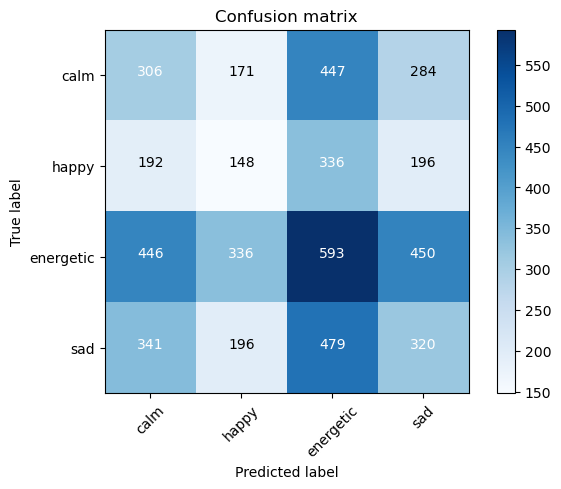

In [209]:
# Create the confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=np.argmax(y_pred, axis=1))

# Define the classes
classes = ['calm', 'happy', 'energetic', 'sad'] # Adjust class names as per your dataset

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix
plot_confusion_matrix(cm, classes)
plt.show()
